# 教師なし学習

## インポート

In [1]:
# KMeans は Windows環境でメモリリークの問題があるので、その回避。
# これは、numpyのインポートより前に設定する必要がある。
import os
os.environ["OMP_NUM_THREADS"] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import make_blobs
import seaborn as sns

# K-means による画像の減色

## ロード

(320, 240, 3)


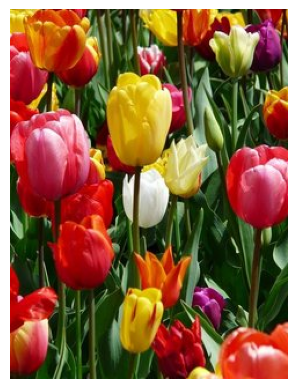

In [2]:
img = plt.imread('data/using_kmeans_for_color_compression_tulips_photo.jpg')
print(img.shape)
plt.imshow(img)
plt.axis('off');

In [3]:
img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
img_flat[:5, :]

array([[211, 197,  38],
       [199, 181,  21],
       [178, 154,   0],
       [185, 152,   0],
       [184, 145,   0]], dtype=uint8)

In [4]:
img_flat.shape

(76800, 3)

In [5]:
img_flat_df = pd.DataFrame(img_flat, columns = ['r', 'g', 'b'])
img_flat_df.head()

,r,g,b
0,211,197,38
1,199,181,21
2,178,154,0
3,185,152,0
4,184,145,0


In [6]:
# ブラウザが開いてプロットされる
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for r,g,b 
                                        in zip(img_flat_df.r.values, 
                                               img_flat_df.g.values, 
                                               img_flat_df.b.values)],
                                 opacity=0.5))
data = [trace]
layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0),
                               )
fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

## K = 1

In [7]:
kmeans = KMeans(n_clusters=1, random_state=42, n_init=10).fit(img_flat)

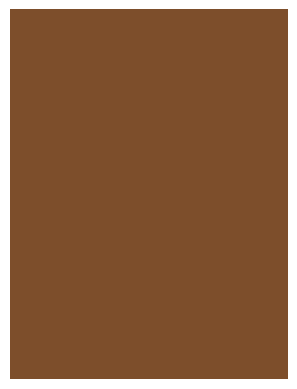

In [8]:
img_flat1 = img_flat.copy()

for i in np.unique(kmeans.labels_):
    img_flat1[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

img1 = img_flat1.reshape(img.shape)

plt.imshow(img1)
plt.axis('off');

### 重心

In [9]:
column_means = img_flat.mean(axis=0)
print('column means: ', column_means)
print('cluster centers: ', kmeans.cluster_centers_)

column means:  [125.60802083  78.90632813  43.45473958]
cluster centers:  [[125.60802083  78.90632812  43.45473958]]


In [10]:
# ブラウザが開いてプロットされる
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for 
                                        r,g,b in zip(img_flat_df.r.values, 
                                                     img_flat_df.g.values, 
                                                     img_flat_df.b.values)],
                                 opacity=0.5))
data = [trace]
layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))

fig = go.Figure(data=data, layout=layout)

# チャートに重心を追加
centroid = kmeans.cluster_centers_[0].tolist()
fig.add_trace(
    go.Scatter3d(x = [centroid[0]],
                 y = [centroid[1]],
                 z = [centroid[2]],
                 mode='markers',
                 marker=dict(size=7,
                             color=['rgb(125.79706706,78.8178776,42.58090169)'],
                             opacity=1))
)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

## K = 3

In [11]:
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(img_flat)
np.unique(kmeans3.labels_)

array([0, 1, 2])

In [12]:
centers = kmeans3.cluster_centers_
centers

array([[ 41.12103746,  50.27000429,  15.92513336],
       [202.70133867, 173.24547366, 109.9790737 ],
       [176.35576261,  42.23342111,  27.28847478]])

In [13]:
def show_swatch(RGB_value):
    '''
    Takes in an RGB value and outputs a color swatch
    '''
    R, G, B = RGB_value
    rgb = [[np.array([R,G,B]).astype('uint8')]]
    plt.figure()
    plt.imshow(rgb)
    plt.axis('off');

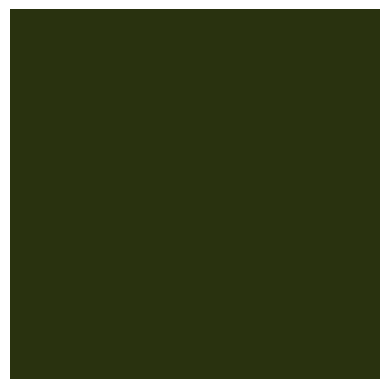

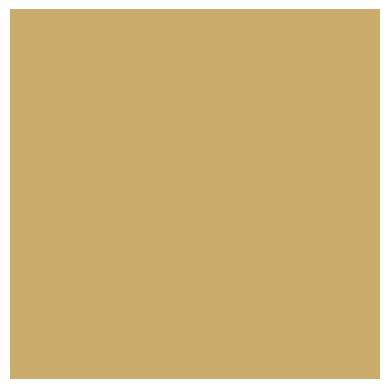

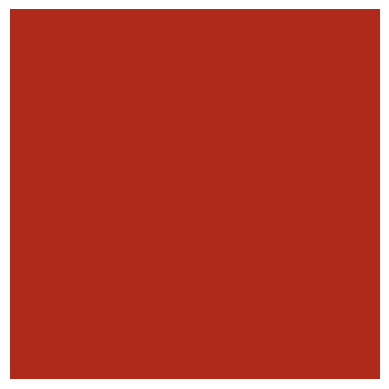

In [14]:
for pixel in centers:
    show_swatch(pixel)

In [15]:
def cluster_image(k, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image.

    Args:
      k:    (int)          - Your selected K-value
      img:  (numpy array)  - Your original image converted to a numpy array

    Returns:
      The output of plt.imshow(new_img), where new_img is a new numpy array \
      where each row of the original array has been replaced with the \ 
      coordinates of its nearest centroid.
    '''

    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init=10).fit(img_flat)
    new_img = img_flat.copy()
  
    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]
  
    new_img = new_img.reshape(img.shape)

    return plt.imshow(new_img), plt.axis('off');

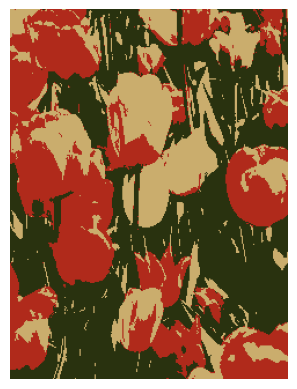

In [16]:
cluster_image(3);

In [17]:
print(kmeans3.labels_.shape)
print(kmeans3.labels_)
print(np.unique(kmeans3.labels_))
print(kmeans3.cluster_centers_)

(76800,)
[1 1 1 ... 2 2 2]
[0 1 2]
[[ 41.12103746  50.27000429  15.92513336]
 [202.70133867 173.24547366 109.9790737 ]
 [176.35576261  42.23342111  27.28847478]]


In [18]:
img_flat_df['cluster'] = kmeans3.labels_
img_flat_df.head()

,r,g,b,cluster
0,211,197,38,1
1,199,181,21,1
2,178,154,0,1
3,185,152,0,1
4,184,145,0,2


In [19]:
series_conversion = {0: 'rgb' +str(tuple(kmeans3.cluster_centers_[0])),
                     1: 'rgb' +str(tuple(kmeans3.cluster_centers_[1])),
                     2: 'rgb' +str(tuple(kmeans3.cluster_centers_[2])),
                     }
series_conversion

{0: 'rgb(41.12103746403419, 50.27000429209399, 15.92513336196448)',
 1: 'rgb(202.70133866751746, 173.24547366263667, 109.97907370363998)',
 2: 'rgb(176.35576260887862, 42.233421105918644, 27.2884747822621)'}

In [20]:
img_flat_df['cluster'] = img_flat_df['cluster'].map(series_conversion)
img_flat_df.head()

,r,g,b,cluster
0,211,197,38,"rgb(202.70133866751746, 173.24547366263667, 10..."
1,199,181,21,"rgb(202.70133866751746, 173.24547366263667, 10..."
2,178,154,0,"rgb(202.70133866751746, 173.24547366263667, 10..."
3,185,152,0,"rgb(202.70133866751746, 173.24547366263667, 10..."
4,184,145,0,"rgb(176.35576260887862, 42.233421105918644, 27..."


In [21]:
# ブラウザが開いてプロットされる
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=img_flat_df.cluster,
                                 opacity=1))
data = trace
layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))

fig = go.Figure(data=data, layout=layout)
fig.show()

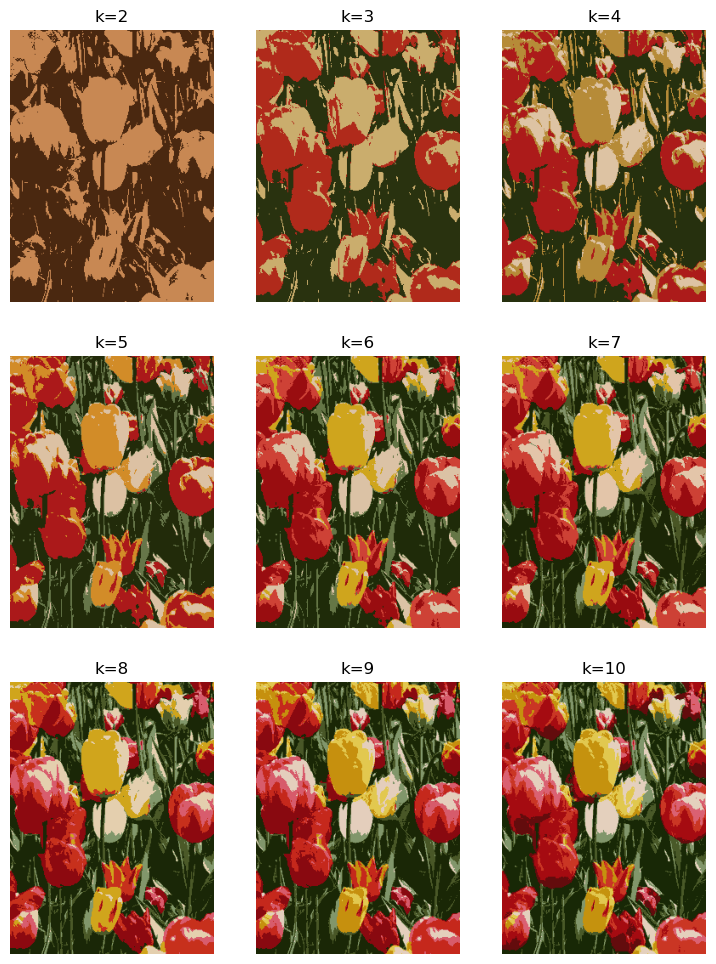

In [22]:
def cluster_image_grid(k, ax, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image on an axis of a figure.

    Args:
      k:    (int)          - Your selected K-value
      ax:   (int)          - Index of the axis of the figure to plot to
      img:  (numpy array)  - Your original image converted to a numpy array

    Returns:
      A new image where each row of img's array has been replaced with the \ 
      coordinates of its nearest centroid. Image is assigned to an axis that \
      can be used in an image grid figure.
    '''
    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(img_flat)
    new_img = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_==i, :] = kmeans.cluster_centers_[i]

    new_img = new_img.reshape(img.shape)
    ax.imshow(new_img)
    ax.axis('off')

fig, axs = plt.subplots(3, 3)
fig = plt.gcf()
fig.set_size_inches(9, 12)
axs = axs.flatten()
k_values = np.arange(2, 11)
for i, k in enumerate(k_values):
    cluster_image_grid(k, axs[i], img=img)
    axs[i].title.set_text('k=' + str(k))

# K-means の評価指標

### ロード

In [23]:
penguins = pd.read_csv("data/penguins.csv")
penguins.head(n = 10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### クリーニング

In [24]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [25]:
penguins['species'].value_counts(dropna = False)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [26]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [27]:
penguins_subset = penguins.dropna(axis=0).reset_index(drop = True)

In [28]:
penguins_subset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [29]:
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


penguins_subset['sex'] = penguins_subset['sex'].str.upper()
penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns=['sex'])
penguins_subset = penguins_subset.drop(['island'], axis=1)
X = penguins_subset.drop(['species'], axis=1)

In [30]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()
penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns=['sex'])
penguins_subset = penguins_subset.drop(['island'], axis=1)
X = penguins_subset.drop(['species'], axis=1)

### スケーリング

In [31]:
X_scaled = StandardScaler().fit_transform(X)

In [32]:
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints. 
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

## Inertia（慣性）

In [33]:
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[885.6224143652253,
 578.8284278107237,
 386.14534424773325,
 284.5464837898291,
 217.94583355138312,
 201.3928784342327,
 185.60496834757095,
 173.28480307333604,
 167.2705621692687]

### エルボープロット

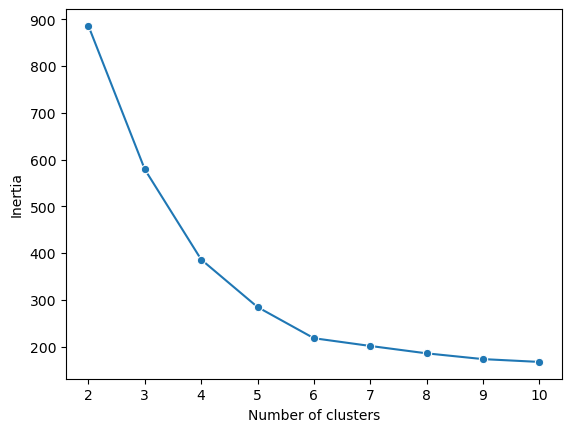

In [34]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

## シルエットスコア

In [35]:
def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value. 
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.44398088353055243,
 0.45101024097188364,
 0.5080140996630784,
 0.519998574860868,
 0.5257260332987354,
 0.47774022332151733,
 0.4213887558059968,
 0.3611605069259161,
 0.4036132056908919]

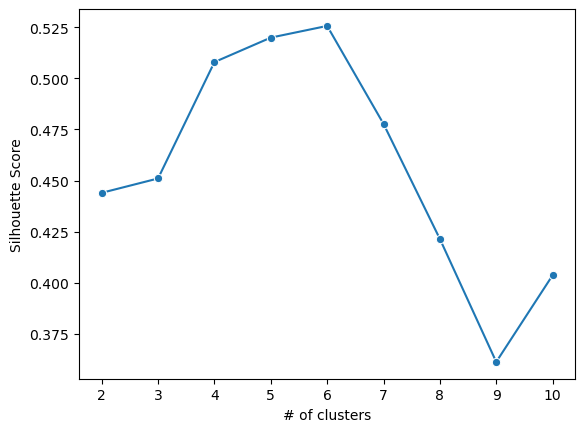

In [36]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

→ 6が最適

## 最適なクラスター数で詳細調査

In [37]:
# K=6 でフィット
kmeans6 = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans6.fit(X_scaled)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [38]:
penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,True,0
1,Adelie,39.5,17.4,186.0,3800.0,False,2
2,Adelie,40.3,18.0,195.0,3250.0,False,2
3,Adelie,36.7,19.3,193.0,3450.0,False,2
4,Adelie,39.3,20.6,190.0,3650.0,True,0


In [39]:
penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Adelie       70
1        Gentoo       58
2        Adelie       73
         Chinstrap     5
3        Gentoo       61
4        Chinstrap    29
5        Adelie        3
         Chinstrap    34
dtype: int64

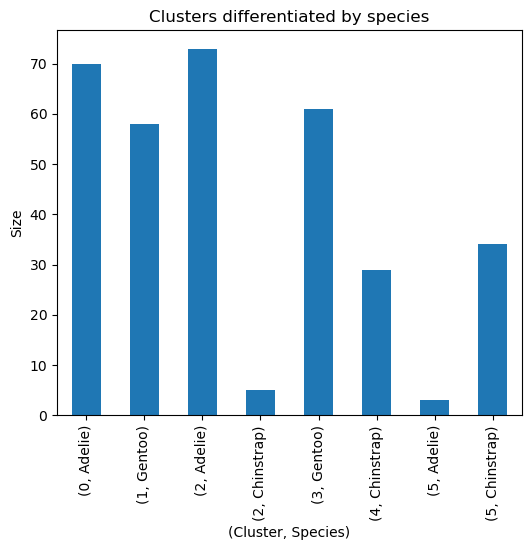

In [40]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

In [41]:
penguins_subset.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
2        Adelie     False       73
0        Adelie     True        70
3        Gentoo     True        61
1        Gentoo     False       58
5        Chinstrap  True        34
4        Chinstrap  False       29
2        Chinstrap  False        5
5        Adelie     True         3
dtype: int64

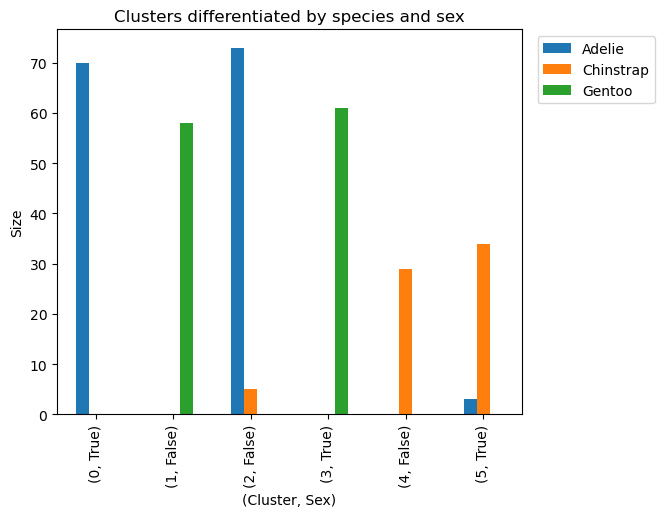

In [42]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))